# Variant Tracker

## Accessing the data in Python outbreak.info’s Variant Tracker

outbreak.info’s Variant Tracker allows you to view how combinations of lineages and mutations are changing over time. These reports allow you to answer questions like:

- What mutations are present within that lineage?
- How prevalent is a variant overall?
- How is the prevalence of the variant changing?
- Where is the variant most prevalent?
- What is known about the variant in the research literature?
  
Here, we’ll demonstrate how to access the data in the P.1 Lineage Report. The P.1 / Gamma lineage was labeled a Variant of Concern by the WHO in January 2021 because it showed evidence of increased transmissibility, virulence, and/or decreased diagnostic, therapeutic, or vaccine efficacy.



## Before we start...

Make sure to Import the packages we’ll use and provide your GISAID credentials to access the data. If you don’t have a GISAID account, you can register for one on their website. It may take a day or two for the account to become active.

In [42]:
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import matplotlib.dates as mdates
from src.outbreak_data import outbreak_data
from src.outbreak_tools import outbreak_tools




matplotlib.rcParams['hatch.linewidth'] = 0.5
matplotlib.rcParams['font.family'] ='sans-serif'
locator = mdates.MonthLocator(bymonthday=1)
locator

In [4]:
# Authenticate yourself using your GISAID credentials
from outbreak_data import authenticate_user
authenticate_user.authenticate_new_user()

Please open this url in a web browswer and authenticate with your GISAID credentials:  https://gpsapi.epicov.org/epi3/gps_authenticate/ELXEXZVRQNRPUNNAJZBAFRKMJPVZJZSZODXXIKWJKHWWNNQYDBUMRZVWYBLJZRSIBDMXDWXGUEUFHOSLCBCMMCCPEAAYKDMPWPRAPDAPNGENVSPAERNQCIHFLPZBJGRD
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenication failed, trying again in 5 seconds...
Waiting for authorization response... [Press Ctrl-C to abort]
Authenticated successfully!

    TERMS OF USE for Python Package and
    Reminder of GISAID's Database Access Agreement
    Your ability to access and use Data in GISAID, including your access and
    use of same via R Pac

## What mutations are characteristic of the variant?

Suppose we look at lineage XBB.1.5. A very basic question: what is XBB? What mutations consistently appear in most sequences within the lineage? Here's how we would find out:

In [ ]:
### Grabbing the characteristic mutations

In [5]:
clinical= outbreak_data.known_mutations('XBB.1', freq=0.75)
clinical

,mutation_count,lineage_count,lineage,gene,ref_aa,alt_aa,codon_num,codon_end,type,prevalence,change_length_nt
mutation,,,,,,,,,,,
s:d614g,29320,29429,XBB.1,S,D,G,614,NaN,substitution,0.996296,NaN
s:h655y,29314,29429,XBB.1,S,H,Y,655,NaN,substitution,0.996092,NaN
orf1b:r1315c,29290,29429,XBB.1,ORF1b,R,C,1315,NaN,substitution,0.995277,NaN
orf1b:p314l,29243,29429,XBB.1,ORF1b,P,L,314,NaN,substitution,0.993680,NaN
e:t9i,29222,29429,XBB.1,E,T,I,9,NaN,substitution,0.992966,NaN
...,...,...,...,...,...,...,...,...,...,...,...
s:t478k,25212,29429,XBB.1,S,T,K,478,NaN,substitution,0.856706,NaN
s:r408s,24551,29429,XBB.1,S,R,S,408,NaN,substitution,0.834245,NaN
orf8:g8*,24308,29429,XBB.1,ORF8,G,*,8,NaN,substitution,0.825988,NaN


In [2]:
import os; os.getcwd()
os.chdir('/Users/sarahrandall/Python-outbreak-info')

Perhaps we want information on a smaller subset of the mutations within XBB.1. We select for them before plotting their prevalences.

In [6]:
clinical_subset = clinical[-7:]
clinical_subset


,mutation_count,lineage_count,lineage,gene,ref_aa,alt_aa,codon_num,codon_end,type,prevalence,change_length_nt
mutation,,,,,,,,,,,
s:s477n,25646,29429,XBB.1,S,S,N,477,NaN,substitution,0.871453,NaN
s:e484a,25485,29429,XBB.1,S,E,A,484,NaN,substitution,0.865983,NaN
s:t478k,25212,29429,XBB.1,S,T,K,478,NaN,substitution,0.856706,NaN
s:r408s,24551,29429,XBB.1,S,R,S,408,NaN,substitution,0.834245,NaN
orf8:g8*,24308,29429,XBB.1,ORF8,G,*,8,NaN,substitution,0.825988,NaN
s:k417n,23383,29429,XBB.1,S,K,N,417,NaN,substitution,0.794556,NaN
s:g252v,22705,29429,XBB.1,S,G,V,252,NaN,substitution,0.771518,NaN


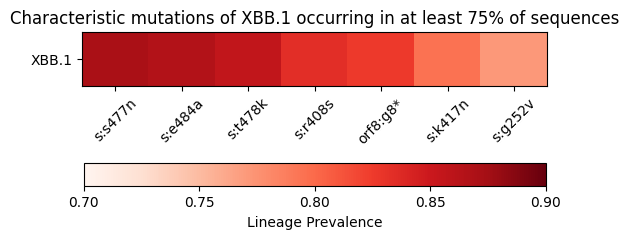

In [7]:
fig, ax = plt.subplots(figsize=(6,2))
plt.pcolor([clinical_subset['prevalence']], cmap='Reds', vmin=0.70, vmax=0.90)
plt.xticks(np.arange(0.5, len(clinical_subset.index), 1), clinical_subset.index, rotation=45)
plt.yticks([0.5], ['XBB.1'])
plt.title(f'Characteristic mutations of XBB.1 occurring in at least 75% of sequences')
cbar = plt.colorbar(location='bottom',pad = 0.5)
cbar.ax.set_xticks([0.70, 0.75,0.8,0.85,0.9])
cbar.set_label('Lineage Prevalence')
plt.savefig('lin_prev_cmap_cl', format='pdf', bbox_inches='tight')
plt.show();




In [ ]:
# In case he actually wants to use lineage-by-date
# clinical = outbreak_data.all_lineage_prevalences(location='USA', other_threshold=0.0, nday_threshold=1)
# clinical
# clinical_prevalences = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, freq='7D', rolling=[1,4,1])
# clinical_prev_data = clinical_prevalences.mul(viral_load_weekly, axis=0).sum()


# clinical_prevalences = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, freq='7D', rolling=[1,4,1])
# clinical_prevalences_daily_unsmoothed = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, rolling=1, freq='D', log=False)
# clinical_prevalences_daily = outbreak_tools.datebin_and_agg(clinical_samples, weights=clinical_samples['total_count'], startdate=startdate, enddate=enddate, rolling=smooth, freq='D', log=False, variance=False)

In [ ]:
Graphing Daily Clinical Prevalences

In [ ]:
We create a function that will normalize the data before plotting:

In [8]:
# Normalizing data 
def lognorm_ci(x, r):
    return (np.exp(np.log(x)-(r**0.5/x)), np.exp(np.log(x)+(r**0.5/x)))

Plotting data:

In [60]:
location_id = 'USA_US-CA'
df = outbreak_data.all_lineage_prevalences(location = location_id)
#df.query("two == 't'")
df = df.query("lineage == 'KP.2.2'")
#df
lin=df.index.get_level_values('lineage')[0]
#df.to_csv('page.csv')

In [66]:
dates = list(df.index.get_level_values('date'))
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-27',
               ...
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01',
               '2024-09-02', '2024-09-03'],
              dtype='datetime64[ns]', length=139, freq=None)

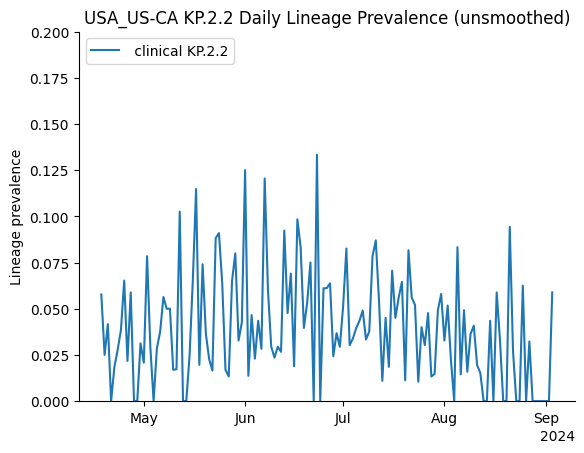

In [64]:
fig, ax=plt.subplots()
ax.plot(dates, df['prevalence'], label=f' clinical {lin}')

ax.set_ylim(0, 0.2)
ax.set_ylabel('Lineage prevalence')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
ax.legend(loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
plt.title(f'{location_id} {lin} Daily Lineage Prevalence (unsmoothed)')
plt.savefig('lin_prev_plot_rolling', format='pdf', bbox_inches='tight')
plt.show();


In [ ]:
_,ax = plt.subplots()
l,u = lognorm_ci(clustered_ww_prevalences_daily_unsmoothed[lin], clustered_ww_prevalences_daily_varis[lin])
ax.scatter(clustered_ww_prevalences_daily_unsmoothed.index.mid, clustered_ww_prevalences_daily_unsmoothed[lin], label=f'wastewater {lin}')
ax.fill_between(clustered_ww_prevalences_daily_unsmoothed.index.mid, l, u, alpha=0.3, zorder=-1)

l,u = lognorm_ci(clustered_cl_prevalences_daily_unsmoothed[lin], clustered_cl_prevalences_daily_varis[lin])
ax.scatter(clustered_cl_prevalences_daily_unsmoothed.index.mid, clustered_cl_prevalences_daily_unsmoothed[lin], label=f'clinical {lin}')
ax.fill_between(clustered_cl_prevalences_daily_unsmoothed.index.mid, l, u, alpha=0.3, zorder=-1)

ax.set_ylim(0, 1)
ax.set_ylabel('Lineage prevalence')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
ax.legend(loc='upper left')
ax.spines[['right', 'top']].set_visible(False)
plt.title(f'{state} Lineage Prevalence (daily unsmoothed)')
plot_out('lin_prev_plot_rolling.pdf')